In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('export_tracks_star.csv', encoding='unicode_escape', decimal=',')

In [3]:
raw_data.shape # 69 instances 28 attribiutes in data_set

(69, 28)


# Podstawowy zestaw danych

Wczytany został podstawowy plik wyjściowy z pluginu TrackMate programu Fiji służącego do śledzenia ruchu obiektów na obrazach. Jak widać na wcześniejszym wywołaniu komendy shape zestaw danych składa się z 69 instacji, z których każda posiada inforamcje takiej jak: track_id, start_frame, stop_frame oraz inne cechy ruchu, które plugin przeliczył w trakcie wykonywania procesu śledzenia. Z wczytanych danych należy wybrać użyteczne w procesie clusteringu cechy oraz dokonać ich standaryzacji. 


In [4]:
raw_data.head()

,LABEL,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
0,Label,Track index,Track ID,Number of spots in track,Number of gaps,Number of split events,Number of merge events,Number of complex points,Longest gap,Track duration,...,Track min speed,Track median speed,Track std speed,Track mean quality,Total distance traveled,Max distance traveled,Confinement ratio,Mean straight line speed,Linearity of forward progression,Mean directional change rate
1,Label,Index,ID,N spots,N gaps,N splits,N merges,N complex,Lgst gap,Duration,...,Min speed,Med. speed,Std speed,Mean Q,Total dist.,Max dist.,Cfn. ratio,Mn. v. line,Fwd. progr.,Mn. ? rate
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(frame),...,(µm/frame),(µm/frame),(µm/frame),(quality),(µm),(µm),NaN,(µm/frame),NaN,(rad/frame)
3,Track_462,0,0,250,0,0,0,0,0,249.0,...,0.012592547401922012,0.23388675075706977,0.18174506893925985,0.8538669741153717,64.90332676903677,4.5710834662765505,0.055788756803038894,0.014541670332634364,0.05578875680303892,2.045171270476615
4,Track_463,1,1,388,0,0,0,0,0,387.0,...,0.006485379838481075,0.2311804504869517,0.2228176755299001,0.8631979981341313,107.60587478993135,7.357544675894323,0.05387905095754452,0.014981143181234797,0.053879050957544465,2.020701714445263


In [5]:
# Summary of dataset:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   LABEL                             68 non-null     object
 1   TRACK_INDEX                       68 non-null     object
 2   TRACK_ID                          68 non-null     object
 3   NUMBER_SPOTS                      68 non-null     object
 4   NUMBER_GAPS                       68 non-null     object
 5   NUMBER_SPLITS                     68 non-null     object
 6   NUMBER_MERGES                     68 non-null     object
 7   NUMBER_COMPLEX                    68 non-null     object
 8   LONGEST_GAP                       68 non-null     object
 9   TRACK_DURATION                    69 non-null     object
 10  TRACK_START                       69 non-null     object
 11  TRACK_STOP                        69 non-null     object
 12  TRACK_DISPLACEMENT      

In [6]:
# Checking for any missing values in data_set:
raw_data.isnull().sum()

LABEL                               1
TRACK_INDEX                         1
TRACK_ID                            1
NUMBER_SPOTS                        1
NUMBER_GAPS                         1
NUMBER_SPLITS                       1
NUMBER_MERGES                       1
NUMBER_COMPLEX                      1
LONGEST_GAP                         1
TRACK_DURATION                      0
TRACK_START                         0
TRACK_STOP                          0
TRACK_DISPLACEMENT                  0
TRACK_X_LOCATION                    0
TRACK_Y_LOCATION                    0
TRACK_Z_LOCATION                    0
TRACK_MEAN_SPEED                    0
TRACK_MAX_SPEED                     0
TRACK_MIN_SPEED                     0
TRACK_MEDIAN_SPEED                  0
TRACK_STD_SPEED                     0
TRACK_MEAN_QUALITY                  0
TOTAL_DISTANCE_TRAVELED             0
MAX_DISTANCE_TRAVELED               0
CONFINEMENT_RATIO                   1
MEAN_STRAIGHT_LINE_SPEED            0
LINEARITY_OF

Widać, że w zestawie danych są wartości NaN, dlatego zostanie dokonane zastąpienie ich na 0 co ułatwi dalsze obliczenia. 

In [7]:
raw_data.fillna(0)

,LABEL,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
0,Label,Track index,Track ID,Number of spots in track,Number of gaps,Number of split events,Number of merge events,Number of complex points,Longest gap,Track duration,...,Track min speed,Track median speed,Track std speed,Track mean quality,Total distance traveled,Max distance traveled,Confinement ratio,Mean straight line speed,Linearity of forward progression,Mean directional change rate
1,Label,Index,ID,N spots,N gaps,N splits,N merges,N complex,Lgst gap,Duration,...,Min speed,Med. speed,Std speed,Mean Q,Total dist.,Max dist.,Cfn. ratio,Mn. v. line,Fwd. progr.,Mn. ? rate
2,0,0,0,0,0,0,0,0,0,(frame),...,(µm/frame),(µm/frame),(µm/frame),(quality),(µm),(µm),0,(µm/frame),0,(rad/frame)
3,Track_462,0,0,250,0,0,0,0,0,249.0,...,0.012592547401922012,0.23388675075706977,0.18174506893925985,0.8538669741153717,64.90332676903677,4.5710834662765505,0.055788756803038894,0.014541670332634364,0.05578875680303892,2.045171270476615
4,Track_463,1,1,388,0,0,0,0,0,387.0,...,0.006485379838481075,0.2311804504869517,0.2228176755299001,0.8631979981341313,107.60587478993135,7.357544675894323,0.05387905095754452,0.014981143181234797,0.053879050957544465,2.020701714445263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Track_1752,1290,1290,7,0,0,0,0,0,6.0,...,0.11313719842926159,0.5056825498122379,0.31140483798019997,0.8376826473644802,3.2495811973447735,2.4337332972043533,0.7489375243778958,0.4056222162007255,0.7489375243778957,1.4176807337398047
65,Track_1949,1487,1487,10,0,0,0,0,0,9.0,...,0.15756360738414,0.4205805291623273,0.28707468622742166,0.8658081471920014,4.530849745677954,2.3252283797180815,0.513199181221172,0.2583587088575646,0.513199181221172,1.4004037242686547
66,Track_1955,1493,1493,112,0,0,0,0,0,111.0,...,0.013433660790994598,0.3108161760602851,0.20583460463221723,0.8171434232166835,37.11425651897602,4.225057235810097,0.107259632611456,0.03586361728714148,0.10725963261145606,1.9456591851395075
67,Track_2382,1920,1920,7,0,0,0,0,0,6.0,...,0.03128939605962908,0.6689424238242826,0.47779104997852195,0.8170451521873474,3.484193931709708,2.2178356360452063,0.6365419604978491,0.36963927267420105,0.6365419604978491,1.9605242126884683


Teraz ze raw_data wybieramy kolumny, które mogą być użyteczne w clusteringu

In [8]:
data_to_clust = raw_data[['LABEL', 'TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED','TRACK_STD_SPEED', 'TOTAL_DISTANCE_TRAVELED',
                          'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED', 'LINEARITY_OF_FORWARD_PROGRESSION', 'MEAN_DIRECTIONAL_CHANGE_RATE']].copy()

In [9]:
data_to_clust.head()

,LABEL,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TOTAL_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
0,Label,Track min speed,Track median speed,Track std speed,Total distance traveled,Confinement ratio,Mean straight line speed,Linearity of forward progression,Mean directional change rate
1,Label,Min speed,Med. speed,Std speed,Total dist.,Cfn. ratio,Mn. v. line,Fwd. progr.,Mn. ? rate
2,NaN,(µm/frame),(µm/frame),(µm/frame),(µm),NaN,(µm/frame),NaN,(rad/frame)
3,Track_462,0.012592547401922012,0.23388675075706977,0.18174506893925985,64.90332676903677,0.055788756803038894,0.014541670332634364,0.05578875680303892,2.045171270476615
4,Track_463,0.006485379838481075,0.2311804504869517,0.2228176755299001,107.60587478993135,0.05387905095754452,0.014981143181234797,0.053879050957544465,2.020701714445263


In [10]:
data_droped = data_to_clust.drop(data_to_clust.index[[0,1,2]]) # deletion of useless rows
data_droped

,LABEL,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TOTAL_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
3,Track_462,0.012592547401922012,0.23388675075706977,0.18174506893925985,64.90332676903677,0.055788756803038894,0.014541670332634364,0.05578875680303892,2.045171270476615
4,Track_463,0.006485379838481075,0.2311804504869517,0.2228176755299001,107.60587478993135,0.05387905095754452,0.014981143181234797,0.053879050957544465,2.020701714445263
5,Track_464,0.009966538653811906,0.2670637310519622,0.204719869900998,140.2107329235038,0.034549348727096744,0.010134287671665182,0.034549348727096765,2.0379597930381035
6,Track_466,0.006818754898762113,0.24815805076910447,0.16263472631130754,65.61069861340832,0.06506995068449287,0.016808208358856706,0.06506995068449282,2.0735463328127977
7,Track_472,0.05305654674570058,0.29669586586900115,0.27679530735415286,29.285207240302523,0.10076665096718647,0.03688715320606608,0.10076665096718647,2.0789072669704587
...,...,...,...,...,...,...,...,...,...
64,Track_1752,0.11313719842926159,0.5056825498122379,0.31140483798019997,3.2495811973447735,0.7489375243778958,0.4056222162007255,0.7489375243778957,1.4176807337398047
65,Track_1949,0.15756360738414,0.4205805291623273,0.28707468622742166,4.530849745677954,0.513199181221172,0.2583587088575646,0.513199181221172,1.4004037242686547
66,Track_1955,0.013433660790994598,0.3108161760602851,0.20583460463221723,37.11425651897602,0.107259632611456,0.03586361728714148,0.10725963261145606,1.9456591851395075
67,Track_2382,0.03128939605962908,0.6689424238242826,0.47779104997852195,3.484193931709708,0.6365419604978491,0.36963927267420105,0.6365419604978491,1.9605242126884683


In [11]:
# replacing all dots to commas in data frame
data_droped.apply(lambda x: x.str.replace('.',','))

,LABEL,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TOTAL_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
3,Track_462,"0,012592547401922012","0,23388675075706977","0,18174506893925985","64,90332676903677","0,055788756803038894","0,014541670332634364","0,05578875680303892","2,045171270476615"
4,Track_463,"0,006485379838481075","0,2311804504869517","0,2228176755299001","107,60587478993135","0,05387905095754452","0,014981143181234797","0,053879050957544465","2,020701714445263"
5,Track_464,"0,009966538653811906","0,2670637310519622","0,204719869900998","140,2107329235038","0,034549348727096744","0,010134287671665182","0,034549348727096765","2,0379597930381035"
6,Track_466,"0,006818754898762113","0,24815805076910447","0,16263472631130754","65,61069861340832","0,06506995068449287","0,016808208358856706","0,06506995068449282","2,0735463328127977"
7,Track_472,"0,05305654674570058","0,29669586586900115","0,27679530735415286","29,285207240302523","0,10076665096718647","0,03688715320606608","0,10076665096718647","2,0789072669704587"
...,...,...,...,...,...,...,...,...,...
64,Track_1752,"0,11313719842926159","0,5056825498122379","0,31140483798019997","3,2495811973447735","0,7489375243778958","0,4056222162007255","0,7489375243778957","1,4176807337398047"
65,Track_1949,"0,15756360738414","0,4205805291623273","0,28707468622742166","4,530849745677954","0,513199181221172","0,2583587088575646","0,513199181221172","1,4004037242686547"
66,Track_1955,"0,013433660790994598","0,3108161760602851","0,20583460463221723","37,11425651897602","0,107259632611456","0,03586361728714148","0,10725963261145606","1,9456591851395075"
67,Track_2382,"0,03128939605962908","0,6689424238242826","0,47779104997852195","3,484193931709708","0,6365419604978491","0,36963927267420105","0,6365419604978491","1,9605242126884683"


In [12]:
# it will let us save the proper index order after scaling step
data_droped = data_droped.reset_index(level=None, drop=True)
data_droped

,LABEL,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TOTAL_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
0,Track_462,0.012592547401922012,0.23388675075706977,0.18174506893925985,64.90332676903677,0.055788756803038894,0.014541670332634364,0.05578875680303892,2.045171270476615
1,Track_463,0.006485379838481075,0.2311804504869517,0.2228176755299001,107.60587478993135,0.05387905095754452,0.014981143181234797,0.053879050957544465,2.020701714445263
2,Track_464,0.009966538653811906,0.2670637310519622,0.204719869900998,140.2107329235038,0.034549348727096744,0.010134287671665182,0.034549348727096765,2.0379597930381035
3,Track_466,0.006818754898762113,0.24815805076910447,0.16263472631130754,65.61069861340832,0.06506995068449287,0.016808208358856706,0.06506995068449282,2.0735463328127977
4,Track_472,0.05305654674570058,0.29669586586900115,0.27679530735415286,29.285207240302523,0.10076665096718647,0.03688715320606608,0.10076665096718647,2.0789072669704587
...,...,...,...,...,...,...,...,...,...
61,Track_1752,0.11313719842926159,0.5056825498122379,0.31140483798019997,3.2495811973447735,0.7489375243778958,0.4056222162007255,0.7489375243778957,1.4176807337398047
62,Track_1949,0.15756360738414,0.4205805291623273,0.28707468622742166,4.530849745677954,0.513199181221172,0.2583587088575646,0.513199181221172,1.4004037242686547
63,Track_1955,0.013433660790994598,0.3108161760602851,0.20583460463221723,37.11425651897602,0.107259632611456,0.03586361728714148,0.10725963261145606,1.9456591851395075
64,Track_2382,0.03128939605962908,0.6689424238242826,0.47779104997852195,3.484193931709708,0.6365419604978491,0.36963927267420105,0.6365419604978491,1.9605242126884683


In [13]:
data_droped_no_label = data_droped.drop('LABEL',1)

In [14]:
# converting the string type of data to float type
data_droped_float = data_droped_no_label.astype(float)
data_droped_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   66 non-null     float64
 1   TRACK_MEDIAN_SPEED                66 non-null     float64
 2   TRACK_STD_SPEED                   66 non-null     float64
 3   TOTAL_DISTANCE_TRAVELED           66 non-null     float64
 4   CONFINEMENT_RATIO                 66 non-null     float64
 5   MEAN_STRAIGHT_LINE_SPEED          66 non-null     float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  66 non-null     float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      66 non-null     float64
dtypes: float64(8)
memory usage: 4.2 KB


# Skalowanie cech

In [15]:
from sklearn.preprocessing import MinMaxScaler
# W celu zachowania informacji, która kolumna jest która
cols = data_droped_float.columns
ms = MinMaxScaler()
# Fit_transform scaler fit on the whole dataset and then used to create a
# transformed version of the dataset with each column standardize independently.
data_scaled = ms.fit_transform(data_droped_float)
# Dodatkowo MinMaxScaler pozwala na dostosowanie cech, których rozkład
# przypomina rozkład noramlny

In [16]:
data_scaled = pd.DataFrame(data_scaled, columns=[cols])

In [17]:
data_scaled.head()

,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TOTAL_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
0,0.012173,0.056391,0.164951,0.453668,0.031402,0.006764,0.031402,0.829013
1,0.005256,0.054349,0.280803,0.763462,0.029358,0.007153,0.029358,0.816917
2,0.009199,0.081429,0.229755,1.000000,0.008661,0.002866,0.008661,0.825449
3,0.005633,0.067161,0.111047,0.458800,0.041340,0.008769,0.041340,0.843040
4,0.058005,0.103792,0.433057,0.195269,0.079562,0.026527,0.079562,0.845690


In [18]:
# adding label to existing scaled data set
#track_labels = data_droped['LABEL']
#data_scaled = data_scaled.join(track_labels)
#data_scaled

# K-means 

In [19]:
# Making elbow plot to consider number of K in our dataset
from sklearn.cluster import KMeans
# PAMIETAĆ o konwersji df na np.array!!!!!
X = np.array(data_scaled.loc[:,['TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED', 'TRACK_STD_SPEED', 'TOTAL_DISTANCE_TRAVELED',
                                'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED', 'LINEARITY_OF_FORWARD_PROGRESSION',
                                'MEAN_DIRECTIONAL_CHANGE_RATE']]).reshape(-1,2)
# after reshaping array we got array with 264 rows in 2 columns
X2 = np.array(data_scaled.loc[:,['TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED', 'TRACK_STD_SPEED', 'TOTAL_DISTANCE_TRAVELED',
                                'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED', 'LINEARITY_OF_FORWARD_PROGRESSION',
                                'MEAN_DIRECTIONAL_CHANGE_RATE']])
disortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    disortions.append(kmeanModel.inertia_)


## Ploting the disortions of K-means

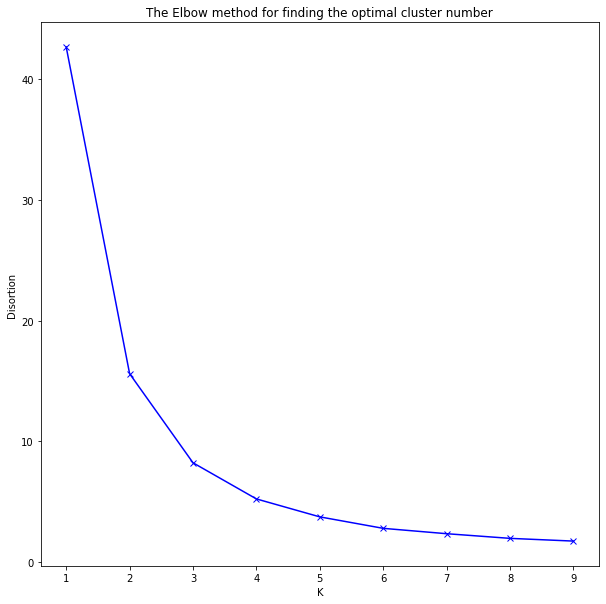

In [20]:
plt.figure(figsize=(10,10))
plt.plot(K, disortions, 'bx-')
plt.xlabel('K')
plt.ylabel("Disortion")
plt.title("The Elbow method for finding the optimal cluster number")
plt.show()

## The Silhouette method

In [21]:
from sklearn.metrics import silhouette_score

sil = []
kmax = range(2,11)

# we have to start from 2 clusters in silhouette coefficient
for k in kmax:
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

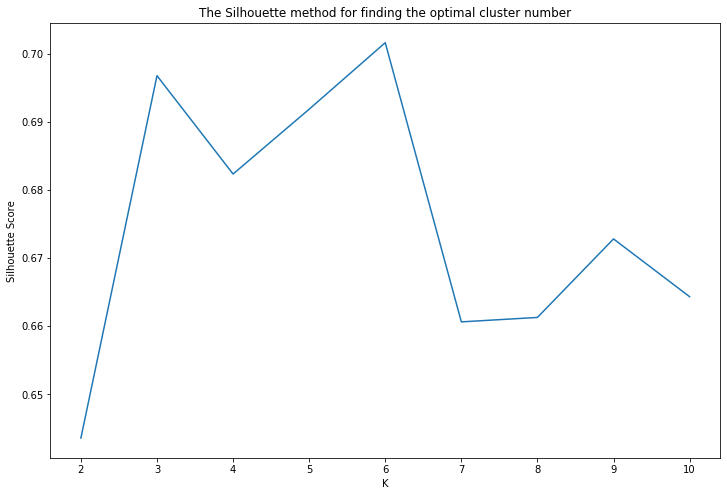

In [22]:
plt.figure(figsize=(12,8))
plt.plot(kmax, sil)
plt.xlabel('K')
plt.ylabel("Silhouette Score")
plt.title("The Silhouette method for finding the optimal cluster number")
plt.show()

W oparciu o powyższe ploty wydawało by się, że odpowiednią liczbą klastrów dla tego zbioru danych jest 3. 

## K-means clustering

Wywołanie:
- init: kmeans++ - zamiast random aby upewnić się, że centroidy są inicjowane z pewną odległoscia między sobą
- n_init: 50 -zwiększamy liczbe inicjalizacji, w celu znalezienia stabilnego rozwiązania
- max_iter: 100 - Zwiększamy liczbe iteracji aby zapewnić zbieżność wyników algorytmu
- random: 0 - ustawiamy seed żeby nasze obliczenia mogły być powtórzone przy ponownym uruchomieniu. 

In [23]:
import hvplot.pandas

In [24]:
# raw data visualization:
data_droped_float.hvplot(
    kind='scatter',
    x='TOTAL_DISTANCE_TRAVELED',
    y=['TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED', 'TRACK_STD_SPEED',
      'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED', 'LINEARITY_OF_FORWARD_PROGRESSION',
      'MEAN_DIRECTIONAL_CHANGE_RATE'],
    backend='plotly',
    width=1000,
)

:NdOverlay   [Variable]
   :Scatter   [TOTAL_DISTANCE_TRAVELED]   (value)

In [25]:
# Kmeans
kmeans2 = KMeans(n_clusters=3, init='k-means++',n_init=50,max_iter=100, 
                random_state=0)
labels = kmeans2.fit_predict(X)
#labels

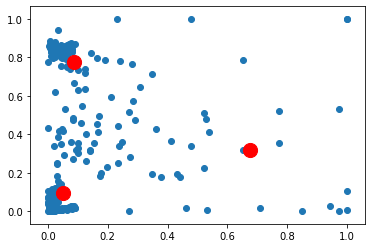

In [26]:
plt.scatter(X[:,0], X[:,1])
# Plot clusters:
plt.scatter(kmeans2.cluster_centers_[:, 0],
           kmeans2.cluster_centers_[:,1],
           s=200, # centroid size
           c='red', #centroid color
           )
plt.show()

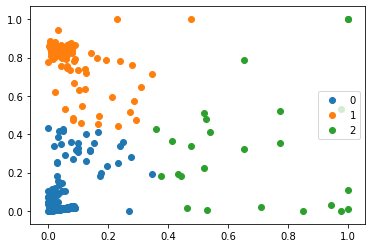

In [27]:
# ploting with diffrent cluster colors:
u_labels = np.unique(labels)
# ploting:
for i in u_labels:
    plt.scatter(X[labels==i,0], X[labels==i, 1], label=i)
plt.legend()
plt.show()

## Analiza klastrowania

Algorytm wyznaczył dwa konkretne klastry w danych plus jeden dodatkowy na rozsianych punktach, które trudno zaklasyfikować. Uważam, że taka sytuacja może wynikać z większej ilości cech.  

## Porównanie cechy każda z każdą / polar plot

In [28]:
import plotly.express as px

## Korelacja rangowa Spearman'a

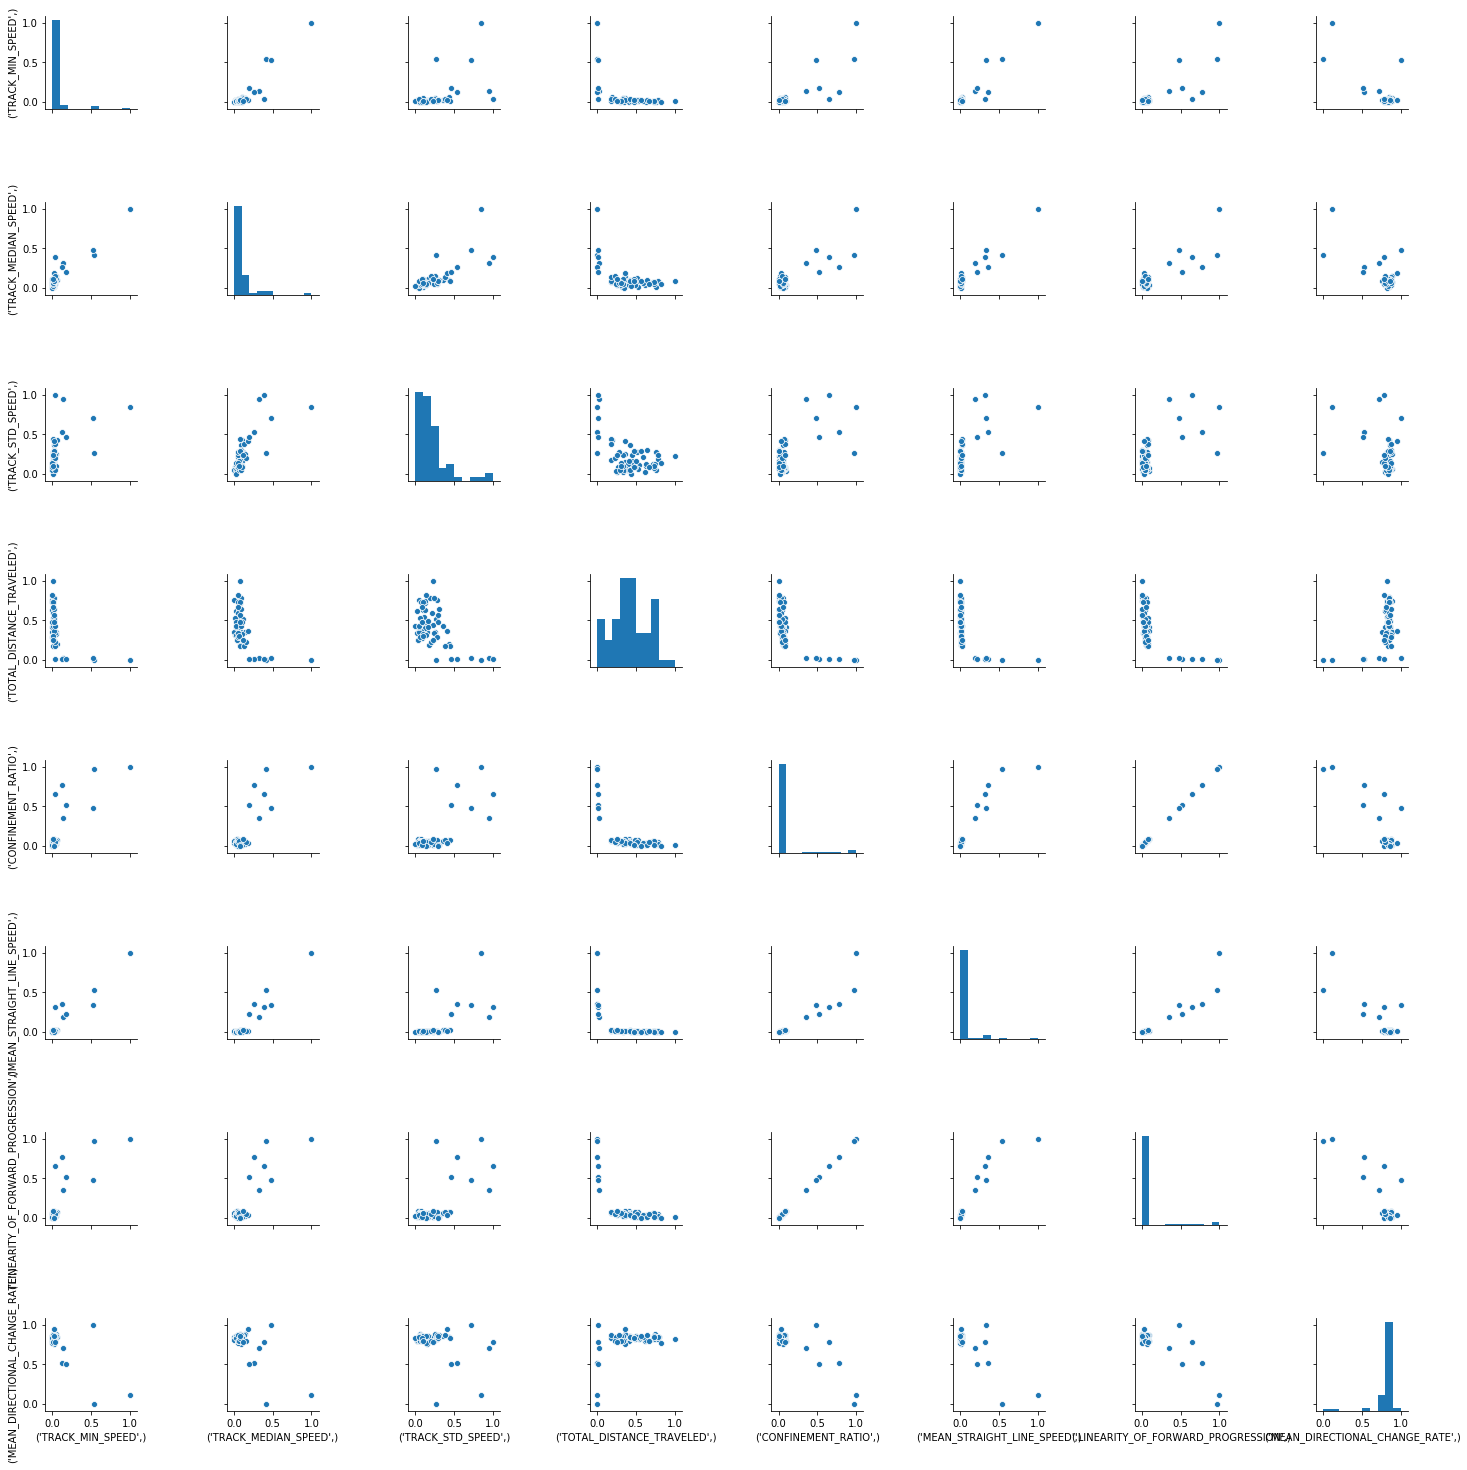

In [55]:
from pylab import rcParams
import scipy
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
import itertools

sns.pairplot(data_scaled)

Widać na podstawie histogramów, że rozkład tych cech nie jest podobny do rozkładu normalnego (na podstawie histogramów)

In [43]:
# Separetion of each column
min_speed = data_scaled[['TRACK_MIN_SPEED']]
med_speed = data_scaled[['TRACK_MEDIAN_SPEED']]
std_speed = data_scaled[['TRACK_STD_SPEED']]
total_traveled = data_scaled[['TOTAL_DISTANCE_TRAVELED']]
con_ratio = data_scaled[['CONFINEMENT_RATIO']]
str_line_speed = data_scaled[['MEAN_STRAIGHT_LINE_SPEED']]
lin_off_progg = data_scaled[['LINEARITY_OF_FORWARD_PROGRESSION']]
mean_dir_chg = data_scaled[['MEAN_DIRECTIONAL_CHANGE_RATE']]

feature_list=[min_speed, med_speed, std_speed, total_traveled, con_ratio,
             str_line_speed, lin_off_progg, mean_dir_chg]
# Creating out put for spearman:
#spearmanr_coefficient, p_value = spearmanr(min_speed, med_speed)
print("Spearman Rank Correletion Coefficient:")

for a,b in itertools.combinations(feature_list, 2):
    spearmanr_coefficient, p_value = spearmanr(a, b)
    print(f"Between {a.columns} and {b.columns}:{spearmanr_coefficient} \n")    
# gdy jest bliżej 1 silna korelacja gdy jest bliżej -1 to mniejsza korelacja miedzy danymi. 

<class 'pandas.core.frame.DataFrame'>
Spearman Rank Correletion Coefficient:
Between MultiIndex([('TRACK_MIN_SPEED',)],
           ) and MultiIndex([('TRACK_MEDIAN_SPEED',)],
           ):0.6282225237449118 

Between MultiIndex([('TRACK_MIN_SPEED',)],
           ) and MultiIndex([('TRACK_STD_SPEED',)],
           ):0.5758271579167102 

Between MultiIndex([('TRACK_MIN_SPEED',)],
           ) and MultiIndex([('TOTAL_DISTANCE_TRAVELED',)],
           ):-0.5372090595971194 

Between MultiIndex([('TRACK_MIN_SPEED',)],
           ) and MultiIndex([('CONFINEMENT_RATIO',)],
           ):0.3563928608704729 

Between MultiIndex([('TRACK_MIN_SPEED',)],
           ) and MultiIndex([('MEAN_STRAIGHT_LINE_SPEED',)],
           ):0.51829662874439 

Between MultiIndex([('TRACK_MIN_SPEED',)],
           ) and MultiIndex([('LINEARITY_OF_FORWARD_PROGRESSION',)],
           ):0.3563928608704729 

Between MultiIndex([('TRACK_MIN_SPEED',)],
           ) and MultiIndex([('MEAN_DIRECTIONAL_CHANGE_RATE',)],
   

## Inne metody do zastosowania:

1. Zrobić rzutowania każdej cechy z każdą i sprawdzić jej pokrycie z wynikiem klastrowania
2. Korelacja rangowa spearmana lub pearsona - done
3. Kolejne podejście do polar plota 